# Statistical and numerical methods in cosmology
# HW #8
### *Hernán E. Noriega B.*
### Instituto de Física, Universidad Nacional Autónoma de México

In [1]:
import numpy as np
import scipy
import scipy.special as sp
import scipy.stats as st
import math
import statistics
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Exercise 1 : Monte Carlo Markov Chain (MCMC)

In this session, we shall code an MCMC algorithm to sample from a univariate distribution (a single parameter) and use a standard Gaussian proposal distribution

In [2]:
#we define the target

def target(theta, theta_c, sigm_d, n):
    P_t = 1/(np.sqrt(2*np.pi)*sigm_d) * np.exp(-(theta - theta_c)**2/(2*sigm_d**2))
    return P_t

theta_c = 2  #center (of the Gaussian)
sigm_d = 0.4 #standard deviation (of the Gaussian)
n = 50000    #number of iterations

##################  MCMC Sampler  #####################

init_theta = -2 #initial parameter value (we see the burn-in process)
n_accept = 0     #gives the number of "accepted steps"
samples = np.zeros(n+1) #samples (that we accept)
samples[0] = init_theta # the first one is "init_theta"

for i in range(n):
    delta_theta = sigm_d * np.random.randn() #Δθ as a normal distribution
    theta_p = init_theta + delta_theta   #we use: θ' = θ_init + Δθ
    
    MH_ratio = min(1,target(theta_p, theta_c, sigm_d, n)
              /target(init_theta, theta_c, sigm_d, n)) #Metropolis-Hastings ratio
    
    u = np.random.uniform() #Uniform random number ∈ [0,1]
    
    if (u <= MH_ratio): #Accept or reject condition
        n_accept += 1    #count the "accepted steps"
        init_theta = theta_p #if accept we "actualized" the "initial" value
    samples[i+1] = init_theta #store accepted proposals

print('Number of iterations:', n)
print('Number of accepted:', n_accept)

Number of iterations: 50000
Number of accepted: 35133


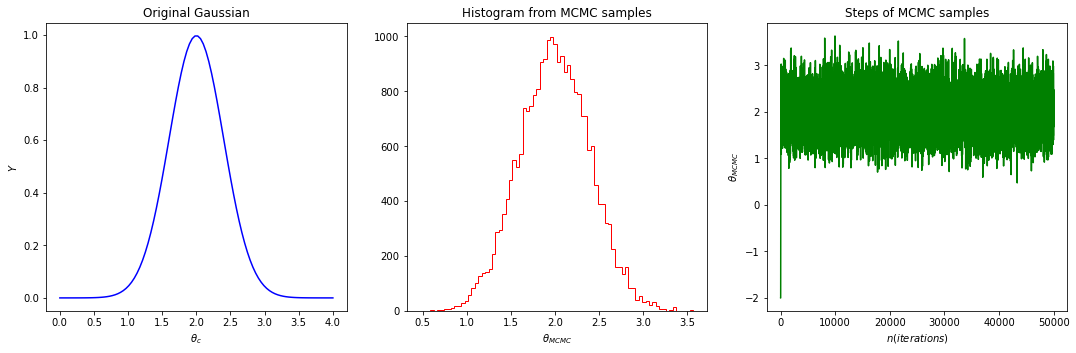

In [3]:
fig, axs = plt.subplots(1, 3, figsize = (18.3, 5.3) )


#Plot of the "original" gassian distribution... (only to comparare with...)
t = np.linspace(0,4,100)
im1 = axs[0].plot(t,target(t, theta_c, sigm_d, n), color = 'b');
axs[0].set_title(r'Original Gaussian')
axs[0].set_xlabel(r'$θ_c$')
axs[0].set_ylabel(r'$Y$')


#Histogram from MCMC samples
m = n//2
im2 = axs[1].hist(samples[m:], bins=80, histtype='step', linewidth=1, color = 'r');
axs[1].set_title(r'Histogram from MCMC samples')
axs[1].set_xlabel(r'$θ_{MCMC}$')


#Steps of MCMC samples
steps = np.linspace(0, n, n+1)
im3 = axs[2].plot(steps, samples, color = 'g');
axs[2].set_title(r'Steps of MCMC samples')
axs[2].set_xlabel(r'$n  (iterations)$')
axs[2].set_ylabel(r'$θ_{MCMC}$')

plt.show()

In [4]:
print('samples:', samples)
print('<θ_{MCMC}>:', np.mean(samples))

samples: [-2.         -2.         -2.         ...  2.28478082  2.01977876
  2.21162476]
<θ_{MCMC}>: 2.003827132572005


observe that the result it is pretty close to the "original" one $\theta_c = 2$